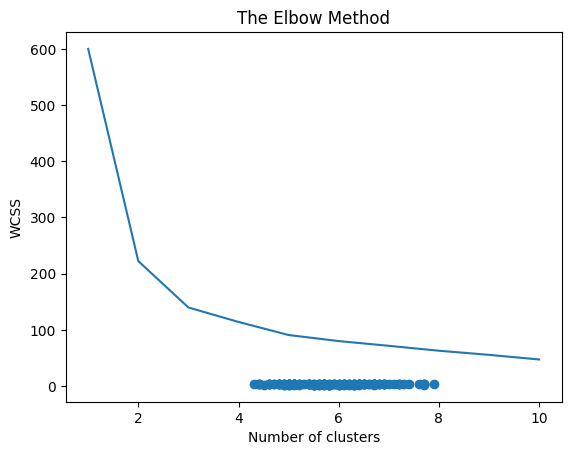

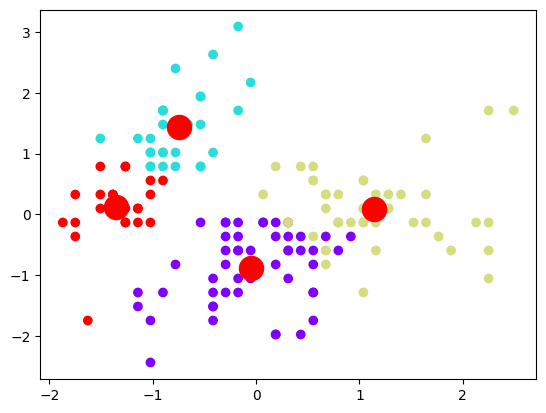

In [7]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

iris = datasets.load_iris()
features = iris.data
plt.scatter(features[:, 0], features[:, 1])
plt

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
Pred_y = kmeans.fit_predict(features)
plt.scatter(features[:, 0], features[:, 1], c=Pred_y, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

datasetPath = "dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

k = 2
iterationCounter = 0
input = dataset

def initCentroids(dataIn, k):
  result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

def plotClustersResult(listClusters, centroids, iterationCounter):
  n = listClustersMembers.__len__()
  colors = cm.rainbow(np.linspace(0, 1, n))
  plt.figure("result")
  plt.clf()
  plt.title("Iteration: " + str(iterationCounter))
  marker = itertools.cycle(('.', '^', '*', 'x', '+',))
  for i in range(n):
    col = next(colors)
    membersCluster = np.asmatrix(listClustersMembers[i])
    plt.scatter(np.ravel(membersCluster[:, 0]), np.ravel(membersCluster[:, 1]),
                marker=marker.__next__(), s=100, c=col, label="kluster " + str(i))
  for i in range(n):
    plt.scatter(np.ravel(centroids[i, 0]), np.ravel(centroids[i, 1]),
                marker=marker.__next__(), s=100, c=col, label="centroid " + str(i + 1))
    if(converged == 0):
      plt.legend()
      plt.ion()


In [ ]:
from operator import ne
from math import e
def kmeans(data, centroidsInit):
  nCluster = k
  global iterationCounter
  centroidsInit = np.matrix(centroidsInit)

  while True:
    iterationCounter += 1
    euclideanMatrixAllClauster = np.ndarray(shape=(data.shape[0],0))

    for i in range(0, nCluster):
      centroidsRepeat = np.repeat(centroidsInit[i], data.shape[0], axis=0)
      deltaMatrix = abs(np.subtract(data, centroidsRepeat))
      euclideanMatrix = np.sqrt(np.sum(np.square(deltaMatrix), axis=1))
      euclideanMatrixAllClauster = \
        np.concatenate((euclideanMatrixAllClauster, euclideanMatrix), axis=1)

   ClusterMatrix = np.ravel(np.matrix(euclideanMatrixAllClauster).argmin(axis=1))
   listClusterMembers = [[] for i in range(k)]
   for i in range(0, data.shape[0]):
     listClustersMembers[np.asscalar(ClusterMatrix[i])].append(data[i, :])

   newCentroids = np.ndarray(shape=(0, centroidsInit.shape[1]))
   for i in range(0, nCluster):
     memberCluster = np.asmatrix(listClustersMembers[i])
     centroidCluster = memberCluster.mean(axis=0)
     newCentroids = np.concatenate((newCentroids, centroidCluster), axis=0)
   print("iter: ", iterationCounter)
   print("centroid ", newCentroids)

   if((centroidsInit == newCentroids).all()):
     break
   centroidsInit = newCentroids

   plotClustersResult(listClustersMembers, centroidsInit, iterationCounter)
   time.sleep(1)

return listClustersMembers, centroidsInit

In [ ]:
centroidInit = initCentroids(input, k)

clusterResult, centroids = kmeans(input, centroidInit)

plotClustersResult(clusterResult, centroids, str(iterationCounter) + " (converged)", 1)

In [11]:
import math

def euclidean_distance(point1, point2):
    """Menghitung jarak Euclidean antara dua titik."""
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def assign_clusters(data_points, cluster_centers):
    """Menentukan klaster untuk setiap titik berdasarkan jarak Euclidean."""
    clusters = {"C1": [], "C2": []}
    for i, point in enumerate(data_points):
        distance_to_C1 = euclidean_distance(point, cluster_centers["C1"])
        distance_to_C2 = euclidean_distance(point, cluster_centers["C2"])

        # Menentukan klaster berdasarkan jarak terdekat
        if distance_to_C1 <= distance_to_C2:
            clusters["C1"].append((f"M{i+1}", point))
        else:
            clusters["C2"].append((f"M{i+1}", point))
    return clusters

def main():
    # Data Titik M1 - M7
    data_points = [(1, 4.5), (3, 6.5), (4, 4.5), (7.5, 3.2), (6, 2.3), (2.5, 3.8), (5, 5.5)]

    # Pusat Klaster C1 dan C2
    cluster_centers = {
        "C1": (3, 4),
        "C2": (6, 4)
    }

    # Menentukan klaster untuk setiap titik
    clusters = assign_clusters(data_points, cluster_centers)

    # Menampilkan hasil klasterisasi
    print("Hasil Klasterisasi:")
    for cluster, points in clusters.items():
        print(f"\n{cluster}:")
        for label, point in points:
            print(f"  {label}: {point}")

if __name__ == "__main__":
    main()


Hasil Klasterisasi:

C1:
  M1: (1, 4.5)
  M2: (3, 6.5)
  M3: (4, 4.5)
  M6: (2.5, 3.8)

C2:
  M4: (7.5, 3.2)
  M5: (6, 2.3)
  M7: (5, 5.5)
